# Generate plots
This notebook aims to generate several plot used during the specialization project. 

In [1]:
import sys
sys.path.append("../scripts")

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import utils

from plotly.subplots import make_subplots
from sklearn.metrics import r2_score

cols = plotly.colors.DEFAULT_PLOTLY_COLORS
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

overwrite = False
plots_path = '/Users/junxingli/Desktop/master_thesis/figs/stand_alone/'
pkl_path = '/Users/junxingli/Desktop/master_thesis/data/processed/SRD_Lysekil.pkl'

In [4]:
df = pd.read_pickle(pkl_path)
    
X = df.drop(['Status', 'SRD'], axis=1)
y = df[['Time', 'SRD']]

cutoff_date = "2020-06-15 00:00"
X_train = X[X["Time"] < cutoff_date].copy()
X_test = X[X["Time"] > cutoff_date].copy()
y_train = y[y["Time"] < cutoff_date].copy()
y_test = y[y["Time"] > cutoff_date].copy()

## NRMSE

In [34]:
df = pd.read_pickle(pkl_path)

mean_srd = df['SRD'].mean()
mean_srd_steady = df[df['Status'] == 'Stable']['SRD'].mean()
mean_srd_unsteady = df[df['Status'] == 'Unstable']['SRD'].mean()

print(f"Mean SRD: {mean_srd}")
print(f"Mean SRD (Stable): {mean_srd_steady}")
print(f"Mean SRD (Unstable): {mean_srd_unsteady}")

print("Case 1:", 100*0.026070637757005313/mean_srd)
print("Case 2:", 100*0.18445642280835153/mean_srd)
print("Case 3:", 100*0.03556691435818585/mean_srd)
print("Case 4:", 100*0.2800986607138114/mean_srd)

Mean SRD: 3.877482658275293
Mean SRD (Stable): 3.85067197304791
Mean SRD (Unstable): 3.910584459428472
Case 1: 0.6723598802270737
Case 2: 4.757117931003149
Case 3: 0.9172681735217878
Case 4: 7.22372439541482


In [73]:
from sklearn.model_selection import train_test_split

np.random.seed(420)

y_train, y_test = train_test_split(df[df['Status'] == 'Stable'], test_size=0.2)
y_case1 = y_test.copy()

y_train, y_test = train_test_split(df, test_size=0.2)
y_case2 = y_test.copy()

y_case3 = df[(df['Time'] > cutoff_date) & (df['Status'] == 'Stable')].copy()
y_case4 = df[(df['Time'] > cutoff_date)].copy()

In [74]:
def NRMSE(y_true, y_mean):
    SE = (y_true['SRD'] - y_mean)**2
    MSE = SE.mean()
    RMSE = np.sqrt(MSE)
    NRMSE = RMSE / mean_srd
    return (RMSE, NRMSE*100)
    
print("Predict using mean SRD")

print("Case 1:", NRMSE(y_case1, mean_srd))
print("Case 2:", NRMSE(y_case2, mean_srd))
print("Case 3:", NRMSE(y_case3, mean_srd))
print("Case 4:", NRMSE(y_case4, mean_srd))

Predict using mean SRD
Case 1: (0.11422232254040027, 2.945785516193809)
Case 2: (0.569762651010141, 14.694137955566559)
Case 3: (0.06871308456346291, 1.772105528745976)
Case 4: (0.3417915321529445, 8.814779130565437)


## Stability analysis

File Stability-Analysis.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Stability-Analysis.pdf.


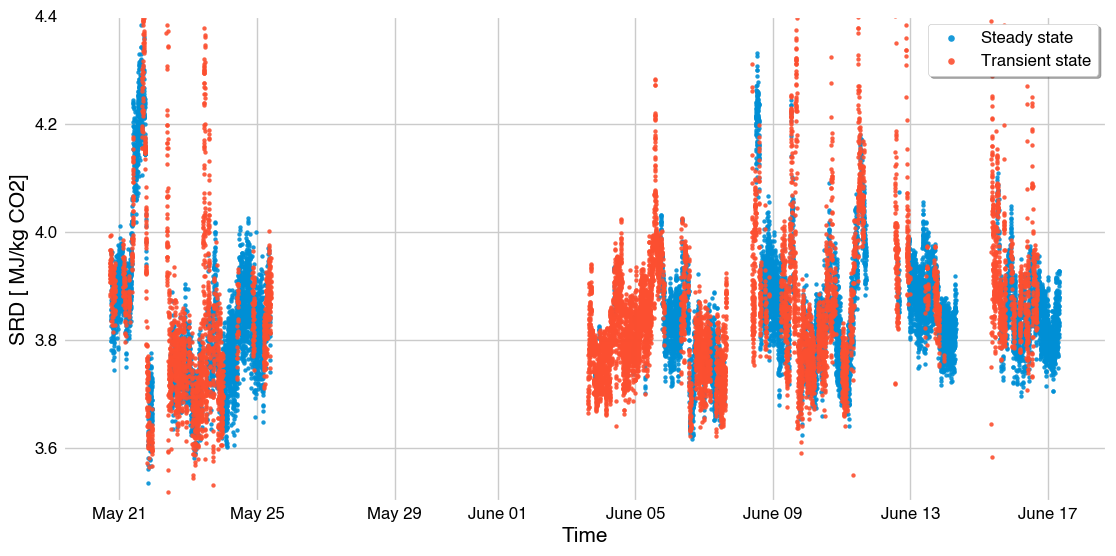

In [29]:
from matplotlib import dates as mdates

df = pd.read_pickle(pkl_path)

steady = df[df['Status'] == 'Stable']
transient = df[df['Status'] == 'Unstable']

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(ax=ax, x=steady['Time'], y=steady['SRD'], label='Steady state', alpha=0.9, s=10, linewidth=0)
sns.scatterplot(ax=ax, x=transient['Time'], y=transient['SRD'], label='Transient state', alpha=0.9, s=10, linewidth=0)

ax.set_ylim(3.5, 4.4)
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('SRD [ MJ/kg CO2]', fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
ax.legend(markerscale=1.5, loc='upper right', shadow=True, fancybox=True)
utils.save_file(plt.gcf(), plots_path, "Stability-Analysis.pdf", 'matplotlib', overwrite=True)
plt.show()

## PCA

### MNIST Example

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

features = penguins.select_dtypes(include=[np.number])  # Only numeric features are considered here
target = penguins['species']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
variance_ratios = pca.explained_variance_ratio_

# Plot the first two principal components
plt.figure(figsize=(8, 8))
species_unique = target.unique()
for species in species_unique:
    species_mask = target == species
    plt.scatter(pca_result[species_mask, 0], pca_result[species_mask, 1], label=species, s=50)

plt.legend(title='Species', markerscale=1.5)
plt.xlabel(f"PC1 ({variance_ratios[0]:.0%} variance)")
plt.ylabel(f"PC2 ({variance_ratios[1]:.0%} variance)")
utils.save_file(plt.gcf(), plots_path, "PCA_Palmer.pdf", "matplotlib", overwrite)
plt.show()

### Lysekil

In [ ]:
df_pca = df.drop(['Status', 'Time', 'T5'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
variance_ratios = pca.explained_variance_ratio_

# Plot the first two principal components
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(ax=axs[0], x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Status'], s=150, linewidth=0.1)
sns.scatterplot(ax=axs[1], x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Status'], s=150, linewidth=0.1)

handles, labels = plt.gca().get_legend_handles_labels()
axs[0].legend(handles, ['Transient state', 'Steady state'], title='Status', markerscale=1.5, loc='upper right', shadow=True, fancybox=True)
axs[0].set_xlabel(f"PC1 ({variance_ratios[0]:.0%} variance)")
axs[0].set_ylabel(f"PC2 ({variance_ratios[1]:.0%} variance)")

axs[1].legend(handles, ['Transient state', 'Steady state'], title='Status', markerscale=1.5, loc='upper right', shadow=True, fancybox=True)
axs[1].set_xlim(-5, 6)
axs[1].set_xlabel(f"PC1 ({variance_ratios[0]:.0%} variance)")
axs[1].set_ylabel(f"PC2 ({variance_ratios[1]:.0%} variance)")
utils.save_file(plt.gcf(), plots_path, "PCA_Lysekil-Full.pdf", "matplotlib", overwrite)
plt.show()

In [ ]:
pca = PCA(n_components=10)
pca.fit(scaled_features)
variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(variance_ratios)

# Create a scree plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(ax=ax, x=range(1, len(variance_ratios) + 1), y=cumulative_variance_ratios, marker='o', markersize=15)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xticks(range(1, len(variance_ratios) + 1))
ax.grid(True)

# Add cumulative explained variance percentages to the plot
for i, v in enumerate(cumulative_variance_ratios):
    ax.text(i+1, v+0.03, f"{v:.0%}", fontsize=12, ha='center')

utils.save_file(plt.gcf(), plots_path, "PCA_Lysekil-Full_with_Scree.pdf", "matplotlib", overwrite)
plt.tight_layout()
plt.show()

## UMAP

### MNIST Example

In [ ]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

mnist = fetch_openml("mnist_784", version=1)
data = np.array(mnist.data)
target = np.array(mnist.target)

np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(data), int(len(data) * 0.1), replace=False)

sampled_data = data[indices]
sampled_target = target[indices]

reducer = umap.UMAP()
embedding = reducer.fit_transform(sampled_data)

In [ ]:
import matplotlib.patheffects as PathEffects

fig, ax = plt.subplots(figsize=(12, 10))
color = sampled_target.astype(int)

# Create the scatter plot
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=color, s=20, cmap='viridis')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Compute the centroids of each class and annotate
for i in np.unique(color):
    mask = color == i
    centroid = np.mean(embedding[mask], axis=0)
    text = ax.annotate(str(i), (centroid[0], centroid[1]), color='black', weight='bold', fontsize=20, ha='center', va='center')
    text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])


utils.save_file(plt.gcf(), plots_path, "UMAP_MNIST.pdf", "matplotlib", overwrite)
plt.show()

### Lysekil

In [ ]:
import umap

df_umap = df.drop(['Status', 'Time', 'T5'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_umap)

umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=3000, min_dist=0.001, spread=2)
umap_result = umap_reducer.fit_transform(scaled_features)

In [ ]:
# Plot the UMAP projection
plt.figure(figsize=(10, 10))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['Status'], s=150, linewidth=0.1)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)
utils.save_file(plt.gcf(), plots_path, "UMAP_All_Clusters_Lysekil-Full.pdf", "matplotlib", overwrite=True)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['Status'], s=50, ax=axs[0, 0])
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['Status'], s=50, ax=axs[0, 1])
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['Status'], s=50, ax=axs[1, 0])
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['Status'], s=50, ax=axs[1, 1])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)

axs[0, 0].set_title('Cluster 1')
axs[0, 0].set_xlim(-6.5, 0)
axs[0, 0].set_ylim(-2, 3.5)
axs[0, 0].legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)

axs[0, 1].set_title('Cluster 2')
axs[0, 1].set_xlim(27.5, 30)
axs[0, 1].set_ylim(4.5, 7.5)
axs[0, 1].legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)

axs[1, 0].set_title('Cluster 3')
axs[1, 0].set_xlim(-18, -8)
axs[1, 0].set_ylim(-4, 8)
axs[1, 0].legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)

axs[1, 1].set_title('Cluster 4')
axs[1, 1].set_xlim(16, 21)
axs[1, 1].set_ylim(-14, 0)
axs[1, 1].legend(handles, ['Transient state', 'Steady state'], markerscale=1.5, loc='upper right', shadow=True, fancybox=True)

utils.save_file(plt.gcf(), plots_path, "UMAP_4_Clusters_Lysekil-Full.pdf", "matplotlib", overwrite)
plt.show()

In [ ]:
import plotly.express as px

# Create the Plotly figure
fig = px.scatter(
    x=umap_result[:, 0],
    y=umap_result[:, 1],
    color=df['Status'],
    labels={'color': 'Status'},
    color_discrete_map={'Normal': 'blue', 'Faulty': 'red'},
    hover_data={'Status': df['Status']},
    title='UMAP Projection',
    width=800,
    height=800
)

# Update the layout
fig.update_layout(
    xaxis_title='UMAP 1',
    yaxis_title='UMAP 2',
    legend=dict(
        title='Status',
        orientation='v',
        yanchor='top',
        y=0.99,
        xanchor='right',
        x=0.99
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=16,
        font_family='Arial'
    )
)

# Update the axis properties
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

# Show the plot
fig.show()

## ANN SFS

File ANN-SFS-RMSE-R2.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/ANN-SFS-RMSE-R2.pdf.


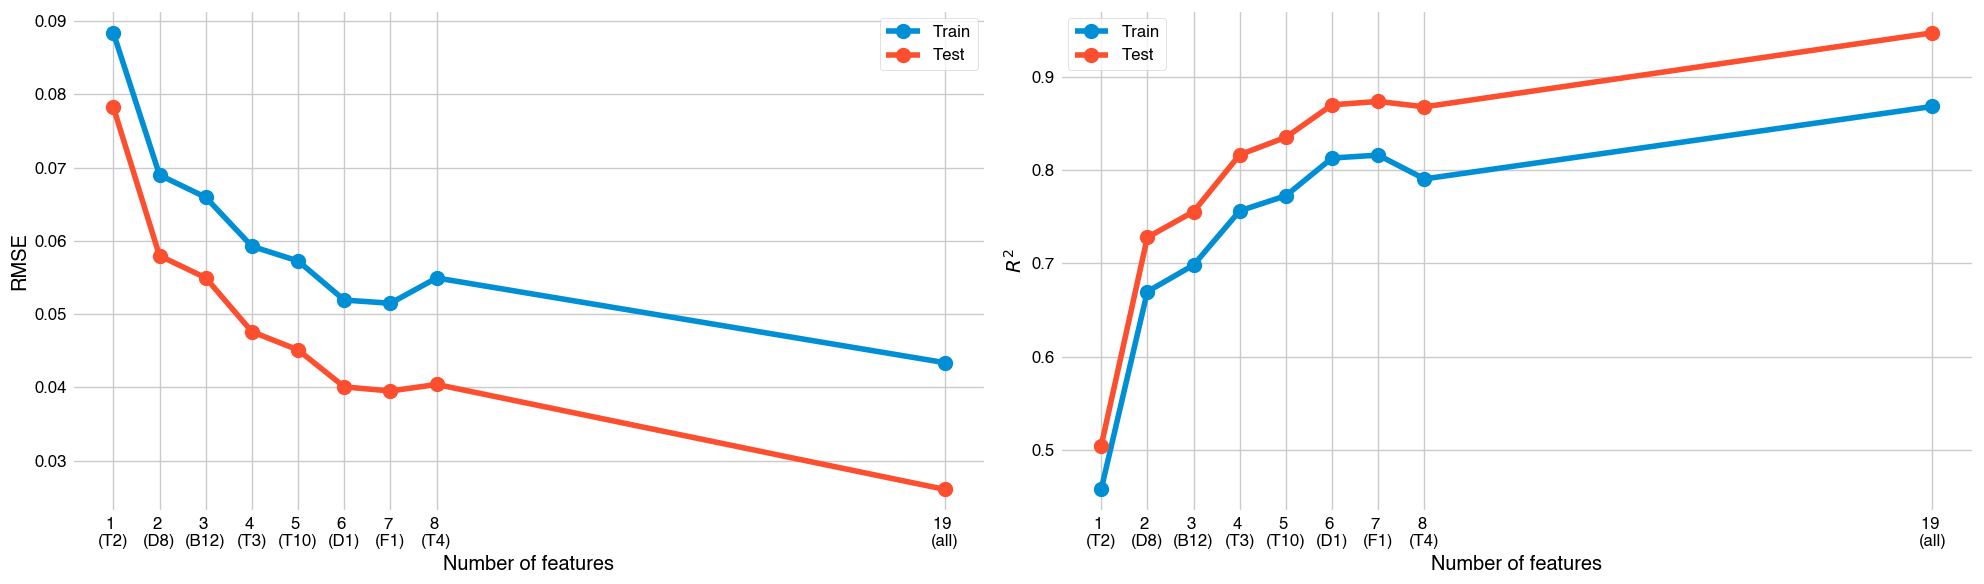

In [31]:
results = {
    "rmse_train": [
        0.08838628973378537, 0.06897750583705616, 0.06593914703197082,
        0.059249608229391446, 0.057242409252187425, 0.05190767514701595,
        0.051475255847327546, 0.05492754521546562, 0.04336625605676838
    ],
    "rmse_test": [
        0.07822472926279427, 0.05795529038138993, 0.05494124429271323,
        0.047594293854688136, 0.045100906404554865, 0.04005693050179103,
        0.03949772763015762, 0.040390532442068534, 0.026070637757005313
    ],
    "r2_train": [
        0.4576229100230722, 0.6696711519723435, 0.6981312339693684,
        0.7562736438065478, 0.7725073665100024, 0.8129340750625653,
        0.8160378158200017, 0.7905347858475777, 0.8682273216065479
    ],
    "r2_test": [
        0.5042004587993278, 0.7278526213781958, 0.7554233652446899,
        0.8164612547025358, 0.8351881162382158, 0.8699910301782139,
        0.8735955962440936, 0.8678165327248103, 0.9471797922992431
    ]}

x = [i for i in range(1, 9)] + [19]
features = ['T2', 'D8', 'B12', 'T3', 'T10', 'D1', 'F1', 'T4', 'all']
formatted_features = [f"{i} \n({feature})" for i, feature in zip(x, features)]

# Creating figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot data on each subplot
axs[0].plot(x, results['rmse_train'], marker='o', markersize=10)
axs[0].plot(x, results['rmse_test'], marker='o', markersize=10)
axs[0].set_xlabel('Number of features')
axs[0].set_ylabel('RMSE')
axs[0].legend(['Train', 'Test'])
axs[0].set_xticks(x, formatted_features)

axs[1].plot(x, results['r2_train'], marker='o', markersize=10)
axs[1].plot(x, results['r2_test'], marker='o', markersize=10)
axs[1].set_xlabel('Number of features')
axs[1].set_ylabel('$R^2$')
axs[1].legend(['Train', 'Test'])
axs[1].set_xticks(x, formatted_features)

plt.tight_layout()
utils.save_file(plt.gcf(), plots_path, "ANN-SFS-RMSE-R2.pdf", "matplotlib", overwrite)
plt.show()

## Training and testing for interpolation

File Train-Test-Extrapolation.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Train-Test-Extrapolation.pdf. Set 'overwrite=True' to overwrite the file.


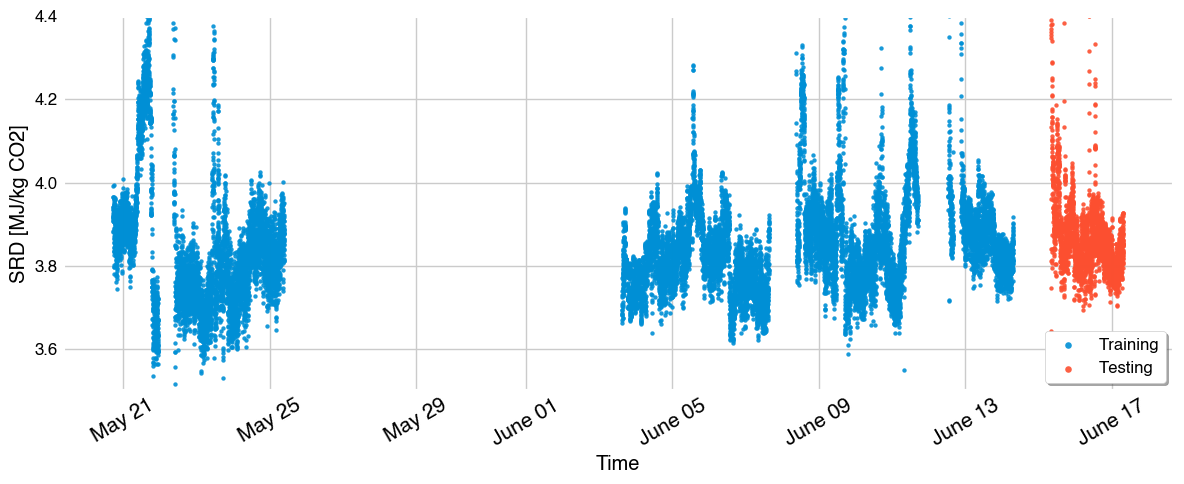

In [4]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
sns.scatterplot(y=y_train['SRD'], x=y_train['Time'], label='Training', alpha=0.9, s=10, linewidth=0)
sns.scatterplot(y=y_test['SRD'], x=y_test['Time'], label='Testing', alpha=0.9, s=10, linewidth=0)

plt.ylim(3.5, 4.4)
plt.xlabel('Time')
plt.ylabel('SRD [MJ/kg CO2]')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
plt.legend(markerscale=1.5, loc='lower right', shadow=True, fancybox=True)
plt.xticks(rotation=30, fontsize=15)
plt.tight_layout()
utils.save_file(plt.gcf(), plots_path, "Train-Test-Extrapolation.pdf", 'matplotlib', overwrite=False)
plt.show()

## Model comparisons

In [6]:
def plot_model_metrics(model_metrics, filename, overwrite=False, loc='lower left'):
    # Prepare the data for plotting
    models = list(model_metrics.keys())
    train_rmse = [model_metrics[model]['rmse'][0] for model in models]
    test_rmse = [model_metrics[model]['rmse'][1] for model in models]
    train_r2 = [model_metrics[model]['r2'][0] for model in models]
    test_r2 = [model_metrics[model]['r2'][1] for model in models]

    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    bar_width = 0.2
    x = range(len(models))

    # Plot RMSE
    ax1.bar([i - bar_width/2 for i in x], train_rmse, width=bar_width, label='Train', color=colors[0])
    ax1.bar([i + bar_width/2 for i in x], test_rmse, width=bar_width, label='Test', color=colors[1])
    ax1.set_xlabel('Models')
    ax1.set_ylabel('RMSE')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models)
    ax1.legend(markerscale=1.5, loc=loc, shadow=True, fancybox=True)
    
    max_rmse = max(max(train_rmse), max(test_rmse))
    ax1.set_ylim(top=max_rmse * 1.1)

    # Plot R2
    ax2.bar([i - bar_width/2 for i in x], train_r2, width=bar_width, label='Train', color=colors[0])
    ax2.bar([i + bar_width/2 for i in x], test_r2, width=bar_width, label='Test', color=colors[1])
    ax2.set_xlabel('Models')
    ax2.set_ylabel('R2')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models)
    ax2.legend(markerscale=1.5, loc=loc, shadow=True, fancybox=True)

    max_r2 = max(max(train_r2), max(test_r2))
    ax2.set_ylim(top=max_r2 * 1.1)

    plt.tight_layout()
    utils.save_file(plt.gcf(), plots_path, filename, "matplotlib", overwrite)
    plt.show()

File All_Cases.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/All_Cases.pdf.


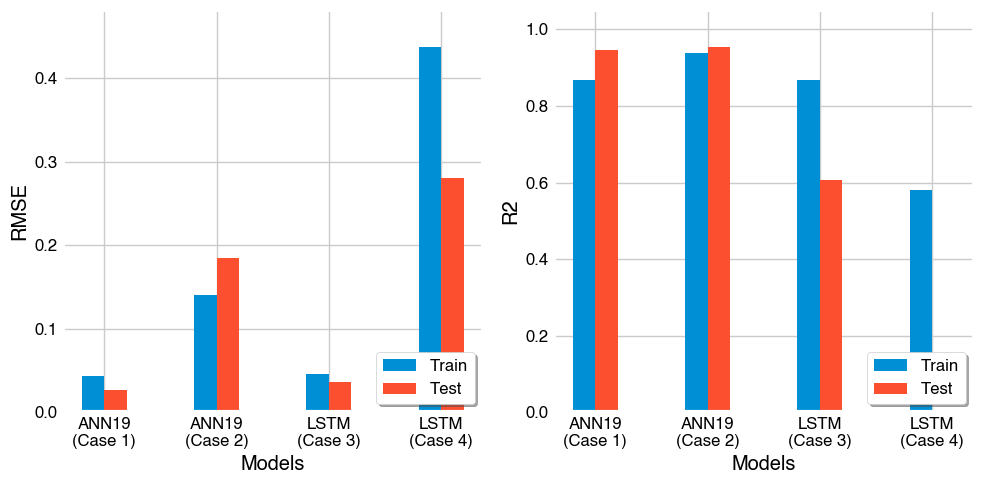

In [30]:
all_cases = {
    'ANN19\n(Case 1)': 
    {
    'rmse': [0.04336625605676838, 0.026070637757005313], 
    'r2': [0.8682273216065479, 0.9471797922992431]
    },
    'ANN19\n(Case 2)': 
    {
    'rmse': [0.1400470733726574, 0.18445642280835153], 
    'r2': [0.9395801953383076, 0.9553217143975529]
    },
    'LSTM\n(Case 3)':
    {
    'rmse': [0.04604688268329526, 0.03556691497860219],
    'r2': [0.8676976444350915, 0.6058137334732503]
    },
    'LSTM\n(Case 4)':
    {
    'rmse': [0.43781715629050694, 0.2800986604822903],
    'r2': [0.5802425168132586, 0.005515987756277485]
    }
        }
    
plot_model_metrics(all_cases, overwrite=False, filename="All_Cases.pdf", loc='lower right')

File Case_1.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Case_1.pdf.


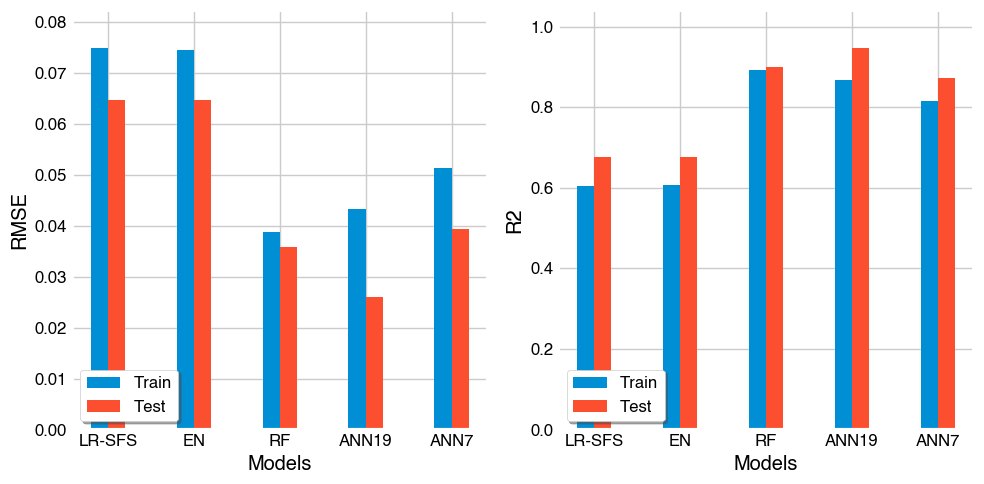

In [6]:
case_1 = {
    'LR-SFS':
    {
    'rmse': [0.07493922194445342, 0.06479764098901],
    'r2': [0.6055833139294349, 0.6770681197060602]
    },
    'EN':
    {
    'rmse': [0.07466623607364632, 0.06472163744254639],
    'r2': [0.6084516136317195, 0.6778252328827343]
    },
    'RF':
    {
    'rmse': [0.03885687251637148, 0.03578512152992558],
    'r2': [0.8939592952701618, 0.901508778513219]
    },
    'ANN19': 
    {
    'rmse': [0.04336625605676838, 0.026070637757005313], 
    'r2': [0.8682273216065479, 0.9471797922992431]
    },
    'ANN7':
    {
    'rmse': [0.051475255847327546, 0.03949772763015762],
    'r2': [0.8160378158200017, 0.8735955962440936]
    },
        }
    
plot_model_metrics(case_1, overwrite, filename="Case_1.pdf")

File Case_2.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Case_2.pdf.


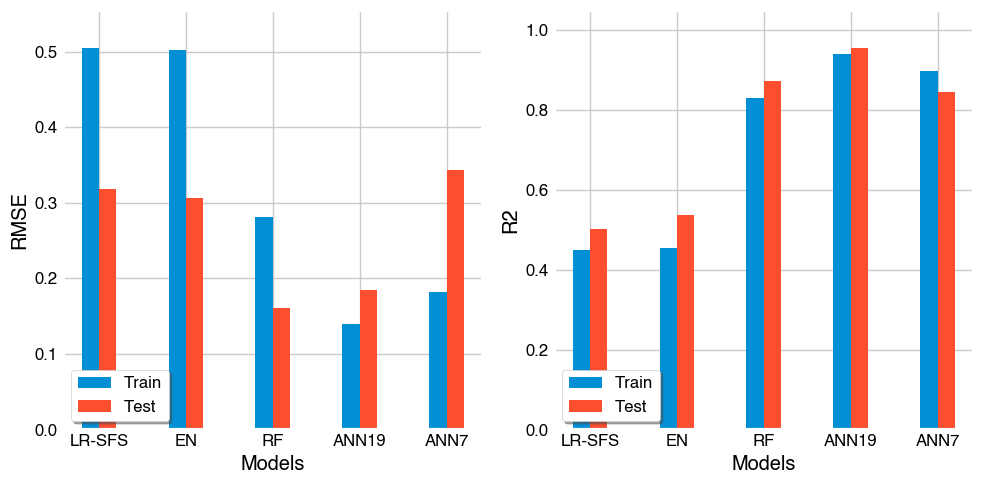

In [8]:
case_2 = {
    'LR-SFS': 
    {
    'rmse': [0.5048764037569584, 0.31795717541938334], 
    'r2': [0.45097582038598516, 0.5017432782881399]
    },
    'EN': 
    {
    'rmse': [0.502673727990239, 0.3061282291097083], 
    'r2': [0.4557559377772601, 0.5381269054105864]
    },
    'RF': 
    {
    'rmse': [0.28147951310242725, 0.16061438981941306], 
    'r2': [0.8293466152481761, 0.8728592379925229]
    },
    'ANN19': 
    {
    'rmse': [0.1400470733726574, 0.18445642280835153], 
    'r2': [0.9395801953383076, 0.9553217143975529]
    },
    'ANN7': 
    {
    'rmse': [0.18226283000857665, 0.34356117976448786], 
    'r2': [0.8976642303252362, 0.8450052076111488]
    },
        }

plot_model_metrics(case_2, overwrite, filename="Case_2.pdf")

File Case_3.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Case_3.pdf.


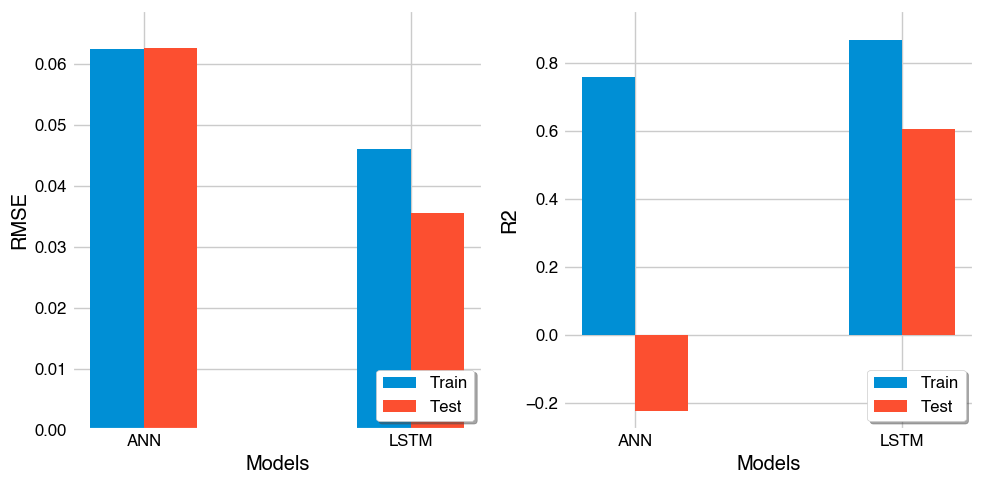

In [9]:
case_3 = {
    'ANN': 
    {
    'rmse': [0.06251192635336579, 0.06268203711955667], 
    'r2': [0.7561667808280328, -0.22432100465729876]
    },
    'LSTM':
    {
    'rmse': [0.04604688268329526, 0.03556691497860219],
    'r2': [0.8676976444350915, 0.6058137334732503]
    }
        }

plot_model_metrics(case_3, overwrite, filename="Case_3.pdf", loc='lower right')

File Case_4.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Case_4.pdf. Set 'overwrite=True' to overwrite the file.


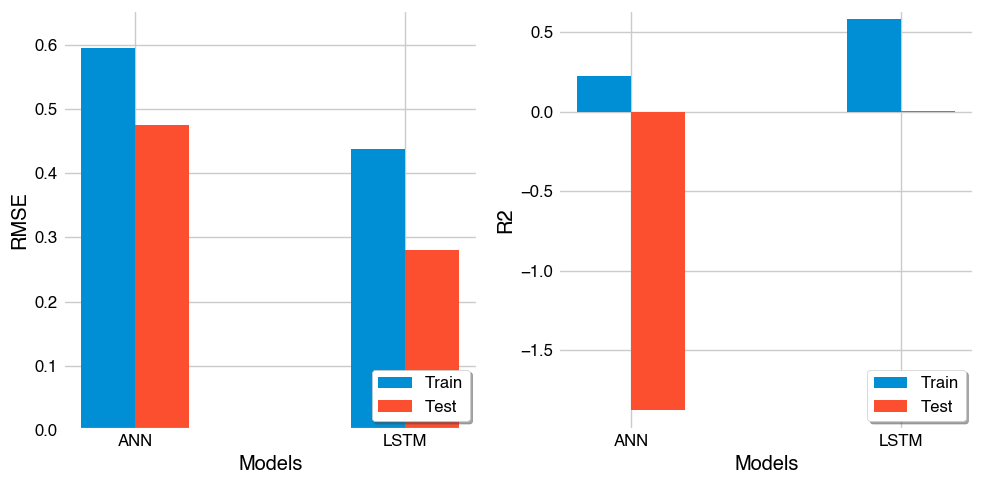

In [16]:
case_4 = {
    'ANN': 
    {
    'rmse': [0.5956749174353673, 0.47635780903179414], 
    'r2': [0.2229812080851079, -1.876353902626207]
    },
    'LSTM':
    {
    'rmse': [0.43781715629050694, 0.2800986604822903],
    'r2': [0.5802425168132586, 0.005515987756277485]
    }
        }

plot_model_metrics(case_4, overwrite=False, filename="Case_4.pdf", loc='lower right')

## Box-plot

File Box-plots.pdf was saved to /Users/junxingli/Desktop/master_thesis/figs/stand_alone/Box-plots.pdf.


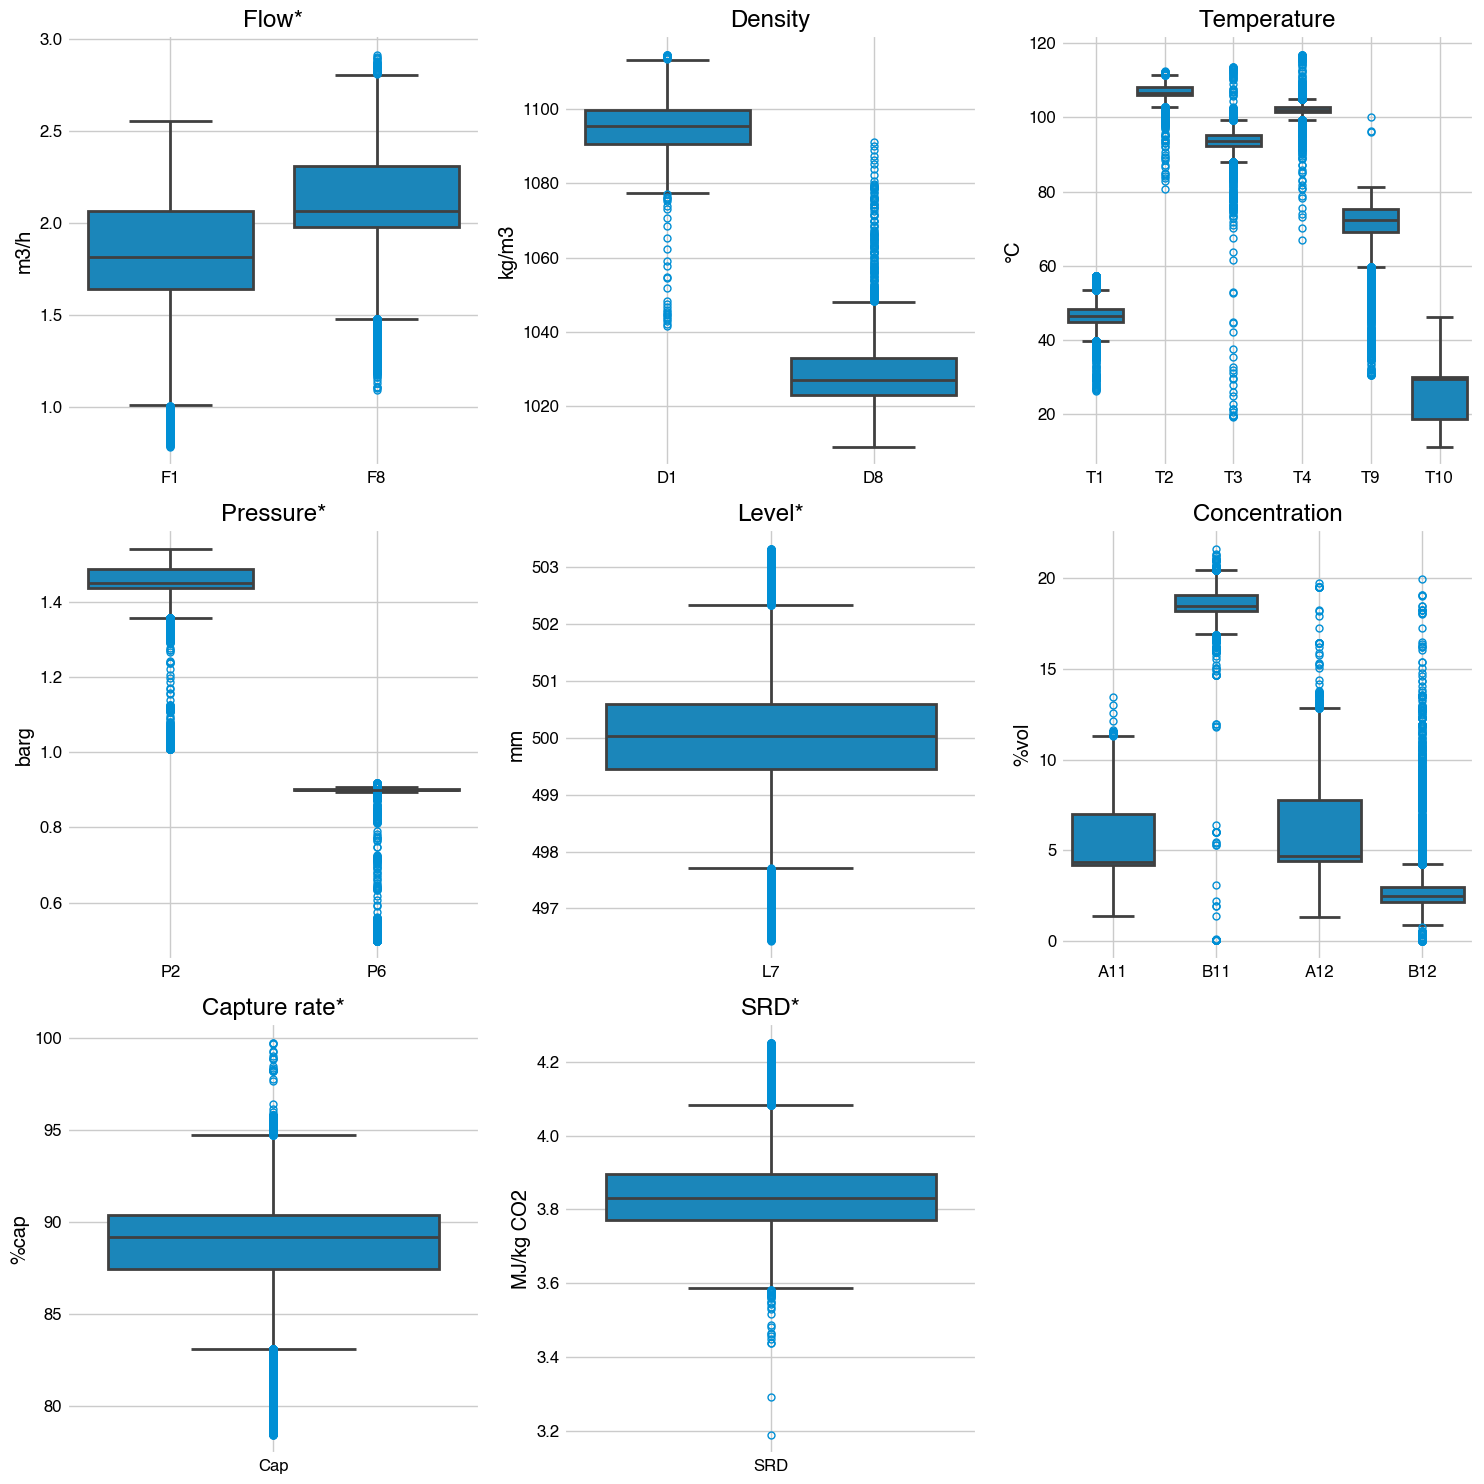

In [4]:
df = pd.read_pickle("../data/processed/SRD_Lysekil.pkl")
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

all_groups = [['F1', 'F8'], 
              ['D1', 'D8'], 
              ['T1', 'T2', 'T3', 'T4', 'T9', 'T10'], 
              ['P2', 'P6'], 
              ['L7'], 
              ['A11', 'B11', 'A12', 'B12'], 
              ['Cap'], 
              ['SRD']]

group_names = ['Flow*', 'Density', 'Temperature', 'Pressure*', 'Level*', 'Concentration', 'Capture rate*', 'SRD*']
axis_names = ['m3/h', 'kg/m3', '°C', 'barg', 'mm', '%vol', '%cap', 'SRD', 'MJ/kg CO2']

n_rows = 3
n_cols = (len(all_groups) + 1) // n_rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
axes = axes.flatten()

# Loop through all groups and create box plots for each group
for ax, group, name, axis_name in zip(axes, all_groups, group_names, axis_names):
    
    if group[0] == 'SRD':
        upper = df[group[0]].quantile(0.98)
        lower = df[group[0]].quantile(0.001)
        x = pd.DataFrame(df[(df[group[0]] < upper) & (df[group[0]] > lower)][group[0]])
    elif group[0] == 'Cap':
        upper = df[group[0]].quantile(1)
        lower = df[group[0]].quantile(0.05)
        x = pd.DataFrame(df[(df[group[0]] < upper) & (df[group[0]] > lower)][group[0]])
    elif group[0] == 'L7':
        upper = df[group[0]].quantile(0.95)
        lower = df[group[0]].quantile(0.05)
        x = pd.DataFrame(df[(df[group[0]] < upper) & (df[group[0]] > lower)][group[0]])
    elif group == ['P2', 'P6']:
        upper = df[group].quantile(0.99)
        lower = df[group].quantile(0.01)
        x = pd.DataFrame(df[(df[group] < upper) & (df[group] > lower)][group])
    elif group == ['F1', 'F8']:
        upper = df[group].quantile(1)
        lower = df[group].quantile(0.001)
        x = pd.DataFrame(df[(df[group] < upper) & (df[group] > lower)][group])
    else:
        x = df[group]
    
    sns.boxplot(data=x, 
                ax=ax, 
                linewidth=2, 
                fliersize=5, 
                color=color,
                flierprops={'markerfacecolor':'none', 
                            'markeredgecolor': color,
                            'marker': 'o'})
    ax.set_ylabel(f'{axis_name}')
    ax.set_title(f'{name}')
    ax.grid(True)

axes[-2].set_ylabel('MJ/kg CO2') # Dont know why this is needed
for i in range(len(all_groups), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
utils.save_file(plt.gcf(), plots_path, "Box-plots.pdf", "matplotlib", overwrite)
plt.show()

## Emission goals for each country

These links shows where the data are gathered from

**Denmark** \
[2030 Target](https://um.dk/en/foreign-policy/new-climate-action-strategy) \
[2022 Progress](https://www.dst.dk/en/Statistik/emner/miljoe-og-energi/groent-nationalregnskab/energi-og-emissionsregnskaber)

**Germany** \
[2030 Target](https://www.bundesregierung.de/breg-de/schwerpunkte/klimaschutz/klimaschutzgesetz-2021-1913672) \
[2022 Progress](https://www.umweltbundesamt.de/en/press/pressinformation/uba-forecast-2022-greenhouse-gas-emissions-down-19)

**United Kingdom** \
[2030 Target](https://researchbriefings.files.parliament.uk/documents/CBP-9888/CBP-9888.pdf) \
[2022 Progress](https://www.ons.gov.uk/economy/environmentalaccounts/bulletins/greenhousegasintensityprovisionalestimatesuk/provisionalestimates2022)

**Sweden** \
[2030 Target](https://climate-laws.org/document/the-swedish-climate-policy-framework_747b) \
[2022 Progress](https://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__MI__MI0107/TotaltUtslappN/table/tableViewLayout1/) \
NATIONAL TOTAL (excluding LULUCF, excluding international transports)

**Finland** \
[2030 Target](https://valtioneuvosto.fi/en/-//1410903/annual-climate-report-additional-measures-are-needed-to-achieve-climate-targets#) \
[2022 Progress](https://www.treasuryfinland.fi/investor-relations/sustainability-and-finnish-government-bonds/data-finlands-ghg-emissions-energy-transition)

**France** \
[2030 Target](https://www.strategie.gouv.fr/sites/strategie.gouv.fr/files/atoms/files/fs-the-value-for-climate-action-final-web.pdf) \
[2022 Progress](https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/chiffres-cles-du-climat-2023/en/9-french-overview-of-greenhouse-gases)

**Norway** \
[2030 Target and 2022 Progress](https://www.ssb.no/natur-og-miljo/forurensning-og-klima/statistikk/utslipp-til-luft/artikler/liten-nedgang-i-utslipp-av-klimagasser-i-2022) \

In [ ]:
df = pd.DataFrame({
    'Country': ['Denmark', 'Germany', 'United Kingdom', 'Sweden', 'Finland', 'Norway', 'France'],
    'Current Emission Reduction': [41, 40, 49, 37, 36, 5, 26],
    'Emission Reduction Goal': [70, 65, 67, 63, 60, 55, 57]
})

# Define the order of countries
country_order = ['Norway', 'Sweden', 'Denmark', 'Finland', 'United Kingdom', 'Germany', 'France']

# Creating the barplot
fig = go.Figure()

# Adding the "Emission Reduction Goal" bar
fig.add_trace(go.Bar(
    x=df['Country'],
    y=df['Emission Reduction Goal'],
    name='2030 Target',
    marker_color=cols[0],
    text=[f'{val}' for val in df["Emission Reduction Goal"]]
))

# Adding the "Current Emission Reduction" bar
fig.add_trace(go.Bar(
    x=df['Country'],
    y=df['Current Emission Reduction'],
    name='2022 progress',
    marker_color=cols[1],
    text=[f'{val}' for val in df["Current Emission Reduction"]],
))

# Update the order of countries
fig.update_xaxes(categoryorder='array', categoryarray=country_order)

# Updating the layout
fig.update_layout(
    height=600, 
    width=1000, 
    barmode='overlay', # Overlay the bars
    xaxis_title='Country',
    yaxis_title='Emission Reduction (%)',
    margin=dict(l=20, r=20, t=20, b=20),
    legend=dict(orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=0.6),
    template="seaborn",
    font=dict(family="Helvetica", size=18),
)

utils.save_file(fig, plots_path, "Emissions-BarPlot.pdf", "plotly", overwrite)
# Display the plot
fig.show()

## CO2 Moisture Content

In [ ]:
def generate_moisture_df(P_tot, T, P_H2O):
    Mm_CO2 = 44.01 # g/mol
    Mm_H2O = 18.02 # g/mol
    results = []
    for P in P_tot:
        # Convert P from barg to bar
        # Convert PH2O from MPa to bar
        x_CO2 = 1 - (P_H2O*10) / (P+1) # Mole fraction
        w_CO2 = x_CO2 * Mm_CO2 / (x_CO2 * Mm_CO2 + (1 - x_CO2) * Mm_H2O ) # Mass fraction
        results.append(w_CO2)

    moisture_df = pd.DataFrame(results, index=P_tot, columns=T)
    moisture_df = moisture_df.rename(columns=lambda x: str(x) + "°C").round(2)
    return moisture_df

def plot_TP_distribution(df):
    """
    Plot the distribution of P6 and T10 in a heatmap.

    Args:
        df (pandas.DataFrame): The input DataFrame containing all PFD data.

    Returns:
        None
    """
    
    # Picking colormap
    cmap_name = "viridis"
    cmap = cm.get_cmap(cmap_name)
    colormap_list = [cmap(i) for i in range(cmap.N)]

    # Create bins for P6 and T10
    p6_bins = np.linspace(0.4, 1.2, 6)
    t10_bins = np.linspace(10, 35, 11)

    # Create a binned DataFrame
    df_binned = pd.DataFrame({
        'P6': pd.cut(df['P6'], bins=p6_bins, include_lowest=True, right=False),
        'T10': pd.cut(df['T10'], bins=t10_bins, include_lowest=True, right=False)
    })

    # Calculate the percentage of data points in each bin
    heatmap_data = df_binned.groupby(['P6', 'T10']).size().reset_index(name='count')
    heatmap_data['percentage'] = 100 * heatmap_data['count'] / len(df)
    heatmap_pivot = heatmap_data.pivot("P6", "T10", "percentage")

    # Plotting the heatmap
    plt.figure(figsize=(16, 8), dpi=300)
    sns.set(font="Verdana")
    sns.set(rc={'axes.facecolor':colormap_list[0]})
    sns.heatmap(heatmap_pivot, annot=True, cmap=cmap_name, 
                fmt=".1f", cbar=True, mask=heatmap_pivot <= 0.15)
    plt.xlabel("T10 intervals [°C]", labelpad=15)
    plt.ylabel("P6 intervals [barg]", labelpad=15)
    plt.show()

In [ ]:
df = pd.read_pickle("../data/processed/SRD_Lysekil.pkl")

fig = go.Figure(data=go.Scatter(x=df["T10"], y=df["P6"], mode='markers'))
fig.update_layout(title="Desorber pressure plotted against condenser temperature", xaxis_title="T10 [°C]", yaxis_title="P6 [barg]")
fig.show()

From the above plot, we can observe 3 distinct pressures and a temperature range of the condenser. This can be used to calculate the moisture content in the $F10$ stream. In order to calculate the moisture content of the $CO_2$ outlet stream, we can utilize the vapor pressure of water as the following Equation from Daltons Law:

\begin{equation*}
    P_{tot} = P_{CO_2} + P_{H_2O}
\end{equation*}

where 

\begin{equation*}
    P_{H_2O} = f(T)
\end{equation*}

which can be found in thermodynamical data sheets. In order to calculate the molar composition, we can use Raoults law:

\begin{align*}
    P_{tot}  &= x_{CO_2} P_{CO_2} \\
    \\
    x_{CO_2} &= \frac{P_{tot}}{P_{CO_2}}= 1 - \frac{P_{H_2O}}{P_{CO_2}}
\end{align*}

Since the measurement of the $CO_2$ stream is given in mass, we transform this into mass fraction.

\begin{align*}
    w_{CO_2} &= \frac{m_{CO_2}}{m_{CO_2} + m_{H_2O}} \\
             &= \frac{x_{CO_2}n_{tot}Mm_{CO_2}}{x_{CO_2}n_{tot}Mm_{CO_2} + x_{H_2O}n_{tot}Mm_{H_2O}} \\
             &= \frac{x_{CO_2}Mm_{CO_2}}{x_{CO_2}Mm_{CO_2} + (1 - x_{CO_2})Mm_{H_2O}}
\end{align*}

In [ ]:
# Picking some intervals by looking at the dropdown plot
P_tot = np.linspace(0.5, 2, 7) # barg
T = np.array([10, 15, 20, 25, 30, 35, 40, 45]) # °C

# Partial pressure of water vapor in MPa 
# from Perry's Chemical Engineers' Handbook
P_H2O = np.array([0.0012282, 0.0017058, 0.0023393, 0.0031699, 
                  0.0042470, 0.0056290, 0.0073849, 0.0095950])

generate_moisture_df(P_tot, T, P_H2O)

From the above Table, we can see that the moisture content is generally under 3%, however to determine whether or not this will pose an issue for our approximations, we make a overview of the data.

In [ ]:
plot_TP_distribution(df)

## Visualize selected temperatures
Used for data exploration and showing how some temperatures vary of the period of operation.

In [ ]:
df = pd.read_pickle("../data/processed/renamed_Lysekil.pkl")
fig = px.scatter(df, x="Time", y=["T1", "T2", "T3"], template="simple_white")

fig.update_traces(marker=dict(size=4,), 
                  selector=dict(mode='markers'))

fig.update_layout(height=600, 
                  width=1000, 
                  margin=dict(b=60, t=40, r=30),
                  xaxis_title='Time', 
                  yaxis_title='Temperature [°C]', 
                  legend_title='Sensors', 
                  legend= {'itemsizing': 'constant'}, 
                  font=dict(family="Helvetica", size=18)
                )

fig.show()
fig.write_image("../figs/temperature.pdf")

## Temperature vs Height plots (aka temperature profile along the desorber)
Starting off with the data from MTU and Aspen Plus across the five cases and a plot function

In [ ]:
# Constants
tot_sec = 61
column_height = 11
height = (11 * np.arange(1, tot_sec + 1) / 61)[::-1]
indices = [0, 18, 42, 60]

# Some data from Aspen Plus
aspen1 = np.array([98.29, 99.8889, 99.9541, 99.9827, 100.01, 100.038, 100.065, 100.092, 100.12, 100.147, 100.174, 100.201, 100.228, 100.255, 100.281, 100.308, 100.335, 100.385, 102.956, 102.89, 102.862, 102.85, 102.824, 102.793, 102.761, 102.729, 102.697, 102.665, 102.635, 102.605, 102.576, 102.55, 102.526, 102.507, 102.492, 102.486, 102.49, 102.51, 102.551, 102.623, 102.735, 102.903, 103.145, 103.484, 103.944, 104.551, 105.324, 106.272, 107.385, 108.634, 109.975, 111.352, 112.713, 114.017, 115.239, 116.366, 117.399, 118.346, 119.216, 120.023, 122.274])
aspen2 = np.array([104.165,106.081,106.164,106.198,106.23,106.263,106.296,106.328,106.36,106.393,106.425,106.457,106.489,106.521,106.552,106.584,106.617,106.678,109.351,109.272,109.242,109.225,109.191,109.153,109.115,109.077,109.041,109.007,108.977,108.951,108.931,108.92,108.923,108.943,108.988,109.069,109.198,109.392,109.675,110.071,110.61,111.317,112.212,113.297,114.556,115.947,117.413,118.89,120.321,121.664,122.894,124.003,124.993,125.875,126.661,127.367,128.006,128.592,129.137,129.651,131.352])
aspen3 = np.array([94.9265, 96.2343, 96.278, 96.2956, 96.3127, 96.3298, 96.3468, 96.3637, 96.3807, 96.3976, 96.4144, 96.4312, 96.448, 96.4648, 96.4815, 96.4981, 96.5154, 96.5519, 99.0136, 99.4083, 99.3642, 99.815, 100.372, 100.974, 101.599, 102.233, 102.866, 103.489, 104.096, 104.681, 105.24, 105.77, 106.271, 106.742, 107.184, 107.598, 107.987, 108.35, 108.692, 109.013, 109.315, 109.601, 109.873, 110.131, 110.378, 110.615, 110.844, 111.066, 111.282, 111.494, 111.704, 111.911, 112.119, 112.328, 112.54, 112.758, 112.983, 113.217, 113.463, 113.724, 115.046])
aspen4 = np.array([99.9979, 101.55, 101.607, 101.63, 101.651, 101.673, 101.695, 101.716, 101.738, 101.759, 101.781, 101.802, 101.823, 101.845, 101.866, 101.887, 101.909, 101.956, 104.561, 104.5, 104.468, 104.462, 104.443, 104.42, 104.396, 104.372, 104.348, 104.324, 104.3, 104.276, 104.253, 104.23, 104.207, 104.185, 104.164, 104.145, 104.128, 104.115, 104.108, 104.108, 104.119, 104.146, 104.197, 104.281, 104.412, 104.61, 104.897, 105.302, 105.858, 106.592, 107.523, 108.652, 109.951, 111.371, 112.847, 114.317, 115.73, 117.056, 118.281, 119.404, 122.21])
aspen5 = np.array([97.0763, 98.7314, 98.8162, 98.8619, 98.9065, 98.9509, 98.9951, 99.039, 99.0828, 99.1264, 99.1698, 99.2129, 99.2559, 99.2987, 99.3413, 99.3838, 99.4267, 99.4898, 102.035, 102.212, 102.261, 102.603, 103.059, 103.623, 104.295, 105.069, 105.931, 106.861, 107.832, 108.815, 109.786, 110.72, 111.603, 112.423, 113.177, 113.864, 114.487, 115.051, 115.56, 116.021, 116.44, 116.822, 117.171, 117.492, 117.79, 118.067, 118.327, 118.572, 118.805, 119.03, 119.246, 119.457, 119.665, 119.871, 120.079, 120.289, 120.506, 120.732, 120.969, 121.223, 122.479])

# Data from plant
case1 = np.array([95.89459991, 102.7618256, 107.7140808, 119.9893417])
case2 = np.array([98.9262085, 108.6126938, 110.0705872, 127.4315796])
case3 = np.array([95.89459991, 102.7618256, 107.7140808, 119.9893417])
case4 = np.array([95.11543274, 103.865715, 103.7567062, 118.0025864])
case5 = np.array([89.06851196, 98.90103149, 100.8353729, 118.9804306])

def make_sub(height, aspen, case, row, col):
    fig.add_trace(
        go.Scatter(y=height, x=aspen, line_shape='spline', 
                line=dict(width=7, color=cols[0])),
        row=row, col=col)

    fig.add_trace(
        go.Scatter(y=height[indices], x=case, mode='markers', 
                   marker=dict(size=12, 
                               symbol='square', 
                               color=cols[0], 
                               line=dict(color='Black', width=1)
                               )
                   ),
                    row=row, col=col)

Plotting the actual temperature profiles and saves as PDF.

In [ ]:
fig = make_subplots(rows=1, cols=5,
                    x_title='Temperature [°C]',
                    y_title='Height [m]',
                    subplot_titles=('BC',  'C1', 'C3', 'E1', 'E3'))

make_sub(height, aspen1, case1, 1, 1)
make_sub(height, aspen2, case2, 1, 2)
make_sub(height, aspen3, case3, 1, 3)
make_sub(height, aspen4, case4, 1, 4)
make_sub(height, aspen5, case5, 1, 5)

for i in range(1, 6):
    for j in range(1, 6):
        x_axis_name = f'xaxis{i}' if i == 1 else f'xaxis{i*j}'
        y_axis_name = f'yaxis{i}' if i == 1 else f'yaxis{i*j}'
        fig.update_layout(
            **{x_axis_name: dict(linewidth=2, linecolor="Black")},
            **{y_axis_name: dict(linewidth=2, linecolor="Black")}
        )

fig.update_annotations(font_size=24)
fig.update_layout(height=600, width=1200, 
                  showlegend=False, template="simple_white",
                  font=dict(family="Helvetica", size=18),
                  margin=dict(b=70, t=40, r=30))

fig.show()
fig.write_image("../figs/TempHeight.pdf", width=1200, height=600, scale=2)

## Parity plot of lean and rich density

In [ ]:
# Data from MTU
D1_MTU = np.array([1088.11499, 1090.425293, 1090.595581, 1091.443726, 1108.435303])
D8_MTU = np.array([1017.941345, 1023.984192, 1020.980042, 1034.57373, 1040.16333])
MTU = np.concatenate((D1_MTU, D8_MTU))

# Data from Aspen Plus
lean_loading = np.array([0.213032066, 0.145038172, 0.171347247, 0.24247849, 0.133190926])
D1_sim = np.array([1055.581956, 1048.781284, 1069.583962, 1051.411844, 1058.672435])
D8_sim = np.array([990.1087732, 968.775124, 987.9521059, 996.0362459, 974.1782947])
sim = np.concatenate((D1_sim, D8_sim))


# Rest of the plot
x = 960
y = 1120

fig = go.Figure(layout_yaxis_range=[x,y], layout_xaxis_range=[x,y])

fig.add_trace(go.Scatter(x=D1_MTU, 
                         y=D1_sim, 
                         mode='markers', 
                         name='Rich density',
                         marker=dict(size=12))
              )

fig.add_trace(go.Scatter(x=D8_MTU, 
                         y=D8_sim, 
                         mode='markers', 
                         name='Lean density',
                         marker=dict(size=12))
              )

fig.add_trace(go.Scatter(x=[x, y], 
                         y=[x, y], 
                         name='1:1 line', 
                         mode='lines', 
                         line={'dash': 'dash', 'color': 'grey'})
              )

fig.update_annotations(font_size=24)
fig.update_layout(
    xaxis_title='Observed (MTU)',
    yaxis_title='Predicted (Aspen Plus)',
    template="simple_white",
    font=dict(family="Helvetica", size=18),
    legend=dict(x=0.05,y=0.95),
    height=600, 
    width=1200,
    margin=dict(t=10, r=20)
)

fig.show()
fig.write_image("../figs/Density.pdf")

## Legacy plots (not used)

In [ ]:
fig = make_subplots(rows=3, cols=2,
                    specs=[[{}, {}],
                           [{}, {}],
                           [{"colspan": 2}, None]],
                    subplot_titles=('Case 1',  'Case 2', 'Case 3', 'Case 4', 'Case 5'))

make_sub(height, aspen1, case1, 1, 1)
make_sub(height, aspen2, case2, 1, 2)
make_sub(height, aspen3, case3, 2, 1)
make_sub(height, aspen4, case4, 2, 2)
make_sub(height, aspen5, case5, 3, 1)

fig['layout']['xaxis']['title']='Temperature [°C]'
fig['layout']['xaxis2']['title']='Temperature [°C]'
fig['layout']['xaxis3']['title']='Temperature [°C]'
fig['layout']['xaxis4']['title']='Temperature [°C]'
fig['layout']['xaxis5']['title']='Temperature [°C]'

fig['layout']['yaxis']['title']='Height [m]'
fig['layout']['yaxis2']['title']='Height [m]'
fig['layout']['yaxis3']['title']='Height [m]'
fig['layout']['yaxis4']['title']='Height [m]'
fig['layout']['yaxis5']['title']='Height [m]'

fig.update_layout(height=800, width=1000, showlegend=False, template="simple_white")
fig.show()

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data from MTU
D1_MTU = np.array([1088.11499, 1090.425293, 1090.595581, 1091.443726, 1108.435303])
D8_MTU = np.array([1017.941345, 1023.984192, 1020.980042, 1034.57373, 1040.16333])
MTU = np.concatenate((D1_MTU, D8_MTU))

# Data from Aspen Plus
lean_loading = np.array([0.213032066, 0.145038172, 0.171347247, 0.24247849, 0.133190926])
D1_sim = np.array([1055.581956, 1048.781284, 1069.583962, 1051.411844, 1058.672435])
D8_sim = np.array([990.1087732, 968.775124, 987.9521059, 996.0362459, 974.1782947])
sim = np.concatenate((D1_sim, D8_sim))

"""# Regression line
slope, intercept = np.polyfit(MTU, sim, 1)
regression_line = slope * MTU + intercept
r2 = r2_score(sim, regression_line)
print(f"R-squared: {r2}")
x = np.max(MTU)
y = np.min(regression_line)
plt.plot([np.min(MTU), np.max(MTU)], 
         [np.min(regression_line), np.max(regression_line)],
         '--', color='grey')"""

x = 980
y = 1120

plt.plot([x, y], [x, y], '--', color='grey')

# Rest of the plot
plt.rcParams['font.family'] = 'Helvetica'
plt.plot(D1_MTU, D1_sim, 'o', label='Rich density')
plt.plot(D8_MTU, D8_sim, 'o', label='Lean density')
plt.legend()
plt.xlabel('Observed (MTU)')
plt.ylabel('Predicted (Aspen Plus)')
plt.savefig("../figs/Density.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
slope, intercept = np.polyfit(D8_sim, lean_loading, 1)
regression_line = slope * D8_sim + intercept
plt.plot(D8_sim, regression_line, '--', color='black')
plt.plot(D8_sim, lean_loading, 'o', label='Lean solvent out')
plt.legend()
plt.xlabel('Predicted lean density (Aspen Plus)')
plt.ylabel('Predicted lean loading (Aspen Plus)')
plt.show()

r2 = r2_score(lean_loading, regression_line)
print(f"R-squared: {r2}")

In [ ]:
plt.plot(D8_MTU, lean_loading, 'o', label='Lean solvent out')
plt.legend()
plt.xlabel('Observed density (MTU)')
plt.ylabel('Predicted lean loading (Aspen Plus)')
plt.show()